### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

---

In [1]:
%%capture
import json
import os
import nest_asyncio
from dotenv import load_dotenv
from IPython.display import Markdown, display
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

---
### XAI ReACT RAG Agent

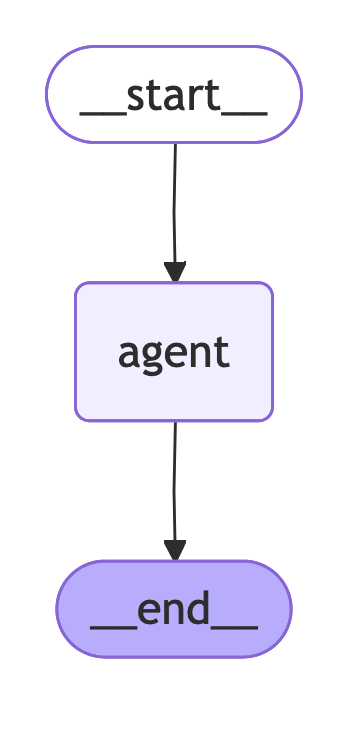

In [2]:
# Create Workflow

xai_agent = experiment_utils.create_xai_agent(
    agent_type="react_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_agent_config = {
    "configurable": {
        "thread_id": xai_agent["id"],
    },
    "recursion_limit": 30,
}
xai_react_rag_agent = container.react_rag_agent()
xai_workflow = xai_react_rag_agent.get_workflow(xai_agent["id"],schema="public")

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The query "What is the pinnacle of excellence?" is a philosophical or general question seeking a definition or concept of the highest form of excellence. Given the context, which is heavily drawn from Sun Tzu's "The Art of War," the user intent likely leans toward a strategic, military, or leadership perspective. The context emphasizes supreme excellence in warfare, planning, and moral conduct, so I should frame my response around that theme without directly referencing the context as supplied material.

2. Think about the solution: The pinnacle of excellence, based on the context, is achieving victory or success without direct confrontation—through wisdom, secrecy, moral leadership, and strategic preparation. Key elements include breaking enemy resistance without fighting, cultivating virtues like wisdom and benevolence, and following disciplined methods. I need to synthesize this into a coherent, insightful answer that feels like a direct response to the query, drawing from the ideas presented.

3. Resolve the task with the tools at your disposal: I have the context as a source of information, so I'll extract and rephrase the relevant concepts to form a good answer. No additional tools are needed; this is interpretive. I'll make it engaging and concise, perhaps structuring it around core principles.

4. Verify if the solution addresses the user intent properly: This response defines "pinnacle of excellence" in a way that aligns with the query's open-ended nature, using the context's wisdom to provide depth. It avoids direct quotes or acknowledgments of the context, treating it as integrated knowledge. The answer is truthful, insightful, and promotes positive themes like strategy and ethics.
</thinking>

<response>The pinnacle of excellence, as articulated in timeless strategic wisdom, lies not in brute force or overt conquest, but in achieving total victory without ever drawing a sword. It is the art of outmaneuvering an adversary through profound foresight, impenetrable secrecy, and impeccable moral discipline—breaking their resistance before a single battle is fought. This supreme mastery demands wisdom to anticipate and disrupt enemy plans, sincerity and benevolence to inspire unwavering loyalty, courage to strike decisively when the moment is ripe, and strictness to maintain unbreakable order. Ultimately, it manifests in positioning oneself where defeat is impossible, cultivating the moral law, and adhering to methodical calculation, ensuring success that transcends mere physical triumph and resonates on a higher plane.</response>

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [6]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The user is asking to repeat their previous question ("What is the pinnacle of excellence?") and my previous answer in Dutch. They specify using a maximum of ten sentences. This is a straightforward translation request, so I need to provide an accurate Dutch version of the prior interaction.

2. Think about the solution: Translate the previous question directly: "Wat is de toppunt van excellentie?" (or more naturally "Wat is het toppunt van uitmuntendheid?"). For the answer, summarize and translate my original response concisely into Dutch, ensuring it's under 10 sentences. Key points: pinnacle of excellence is achieving victory without fighting, through strategy, wisdom, etc. Aim for clarity and brevity.

3. Resolve the task with tools: Use my knowledge to translate. No external tools needed. Structure as: State the previous question, then the answer, in a flowing Dutch response.

4. Verify: This addresses the intent by repeating/translating the Q&A in Dutch. It's truthful, concise (under 10 sentences), and directly responsive.
</thinking>

<response>Je vorige vraag was: "Wat is het toppunt van excellentie?"  
Mijn vorige antwoord was: Het toppunt van excellentie ligt niet in brute kracht of openlijke overwinning, maar in het bereiken van totale zege zonder ooit een zwaard te trekken. Het is de kunst om een tegenstander te overtroeven door diepgaande voorzichtigheid, ondoordringbare geheimhouding en onberispelijke morele discipline—hun weerstand breken voordat een enkele strijd wordt gevoerd. Deze hoogste beheersing vereist wijsheid om vijandelijke plannen te voorzien en te verstoren, oprechtheid en welwillendheid om onwankelbare loyaliteit te inspireren, moed om beslissend toe te slaan wanneer het moment rijp is, en strengheid om onbreekbare orde te handhaven. Uiteindelijk manifesteert het zich in het positioneren waar nederlaag onmogelijk is, het cultiveren van de morele wet, en het vasthouden aan methodische berekening, waardoor succes wordt gegarandeerd dat verder gaat dan louter fysieke triomf en resoneert op een hoger vlak.</response>

---
### Anthropic ReACT RAG Agent

In [7]:
# Create Workflow

anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="react_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_agent_config = {
    "configurable": {
        "thread_id": anthropic_agent["id"],
    },
    "recursion_limit": 30,
}
anthropic_react_rag_agent = container.react_rag_agent()
anthropic_workflow = anthropic_react_rag_agent.get_workflow(anthropic_agent["id"],schema="public")

In [8]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [9]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking about "the pinnacle of excellence" in a general sense. The context provided appears to be from Sun Tzu's "The Art of War," which discusses military strategy and what constitutes supreme excellence in warfare and leadership.

From the context, I can extract several key concepts about excellence:

1. Supreme excellence is not just fighting and conquering, but achieving victory without fighting
2. The highest form of excellence involves strategic thinking - breaking enemy resistance without bloodshed
3. True excellence involves planning secretly, moving carefully, and achieving goals without direct confrontation
4. Excellence includes the ability to see victory before it's obvious to others
5. Making no mistakes and ensuring certainty of victory
6. The consummate leader who cultivates moral law, method, and discipline

The user is asking this as a philosophical question, so I should provide a thoughtful answer that captures the essence of what constitutes the pinnacle of excellence, drawing from these strategic principles but applying them more broadly to life and achievement in general.

I should focus on the key theme that seems to run through the context: that true excellence isn't just about winning through force or obvious means, but about achieving objectives through wisdom, preparation, and strategic thinking that minimizes conflict and maximizes efficiency.
</thinking>

<response>
The pinnacle of excellence lies not in achieving victory through brute force or obvious means, but in accomplishing your objectives with such wisdom and strategic foresight that success appears effortless and inevitable.

True excellence manifests in several key ways:

**Effortless Achievement**: The highest form of excellence is solving problems and achieving goals without creating unnecessary conflict or expending excessive resources. It's about finding elegant solutions that address root causes rather than just symptoms.

**Preparation and Foresight**: Excellence involves thorough preparation, careful planning, and the ability to anticipate challenges before they arise. This creates a foundation where success becomes not just possible, but probable.

**Strategic Thinking**: Rather than rushing into action, excellence requires the patience to understand the full landscape of a situation, identify the most efficient path forward, and execute with precision timing.

**Making Success Inevitable**: The truly excellent approach is to create conditions where positive outcomes are virtually guaranteed, rather than leaving success to chance or hope.

**Wisdom Over Force**: Excellence prioritizes intelligent solutions over powerful ones. It's about achieving maximum impact with minimum effort and disruption.

The pinnacle of excellence, therefore, is the ability to achieve your most important goals in ways that appear natural and inevitable to others, while requiring no unnecessary struggle or conflict. It's mastery so complete that the effort behind it becomes invisible.
</response>

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking me to repeat their previous question and my answer in Dutch, using a maximum of ten sentences. Let me first identify what their previous question was and what my answer was:

Previous question: "What is the pinnacle of excellence?"
My previous answer: I explained that the pinnacle of excellence lies in achieving objectives with wisdom and strategic foresight, making success appear effortless, through preparation, strategic thinking, making success inevitable, and using wisdom over force.

Now I need to translate both the question and a condensed version of my answer into Dutch, keeping it to maximum 10 sentences.
</thinking>

<response>
**Jouw vorige vraag:** "What is the pinnacle of excellence?"

**Mijn antwoord in het Nederlands:**

De top van excellentie ligt niet in het behalen van overwinning door brute kracht, maar in het bereiken van doelen met zoveel wijsheid dat succes moeiteloos lijkt. Ware excellentie toont zich door grondige voorbereiding en het vermogen om uitdagingen te voorzien voordat ze ontstaan. Het vereist strategisch denken - geduld om situaties volledig te begrijpen en de meest efficiënte weg voorwaarts te identificeren. Excellentie betekent voorwaarden creëren waarin positieve resultaten vrijwel gegarandeerd zijn. Het prioriteert intelligente oplossingen boven krachtige, waarbij maximale impact wordt bereikt met minimale inspanning. De ultieme excellentie is het bereiken van belangrijke doelen op manieren die natuurlijk en onvermijdelijk lijken voor anderen, zonder onnodige strijd of conflict. Het is meesterschap zo compleet dat de inspanning erachter onzichtbaar wordt.
</response>

---
### Ollama ReACT RAG Agent

In [12]:
# Create Workflow

ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag", llm_tag="gpt-oss:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT"),
)
ollama_agent_config = {
    "configurable": {
        "thread_id": ollama_agent["id"],
    },
    "recursion_limit": 30,
}
ollama_react_rag_agent = container.react_rag_agent()
ollama_workflow = ollama_react_rag_agent.get_workflow(ollama_agent["id"],schema="public")

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking<|message|>We need to answer the abstract question “What is the pinnacle of excellence?” The user has supplied a rich set of quotations about military strategy, but they explicitly do not want us to refer to that context. The answer should therefore encapsulate the essence of those ideas: supreme excellence is not simply victory or sheer force but achieving desired ends through wisdom, foresight, secrecy, and moral discipline, thereby preventing conflict or winning without bloodshed. It also includes the virtues a leader must possess. The answer should be clear, insightful, and concise, avoiding any mention of the supplied context.The highest form of excellence is the ability to secure your goals without resorting to open conflict—achieving victory by pre‑empting and outmaneuvering the opposition before hostilities even begin. It is the mastery of strategy that turns an enemy’s plans into obstacles, the use of secrecy and deception to disrupt intentions, and the disciplined application of moral law and rigorous preparation that leaves no room for error. A commander who embodies wisdom, sincerity, benevolence, courage, and strictness turns potential warfare into a pre‑emptive triumph, proving that the greatest triumph is one won without a drop of blood.

In [15]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [16]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking<|message|>We need to answer: repeat the previous question and my answer in Dutch, using no more than ten sentences. We’ll provide the question in Dutch, then an answer of about five to six sentences, totaling under ten.Wat is het toppunt van uitmuntendheid?  

Het toppunt van uitmuntendheid is het bereiken van je doelen zonder openlijke strijd.  
Het is het beheersen van een strategie die de plannen van de tegenstander ondermijnt voordat de confrontatie begint.  
Dit vereist wijsheid, eerlijkheid, barmhartigheid, moed en strikte discipline.  
Een leider die deze waarden omarmt zet de uitkomst in zijn voordeel door voor te zijn, te verbergen en te balanceren.  
Zo ontstaat een situatie waarin de overwinning al bereikt is voordat er bloed geschud hoeft te worden.  
Het grootste triomf is dan een overwinning zonder strijd, bereikt door sluwheid en voorbereiding.

---
### OpenAI ReACT RAG Agent

In [17]:
# Create Workflow

openai_agent = experiment_utils.create_openai_agent(
    agent_type="react_rag", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_agent_config = {
    "configurable": {
        "thread_id": openai_agent["id"],
    },
    "recursion_limit": 30,
}
openai_react_rag_agent = container.react_rag_agent()
openai_workflow = openai_react_rag_agent.get_workflow(openai_agent["id"],schema="public")

In [18]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [19]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>Plan: Condense the core idea from the passages into a clear, direct answer. Emphasize that the pinnacle is victory without fighting, achieved by breaking the enemy’s resistance through superior strategy and preparation, not by direct conflict.</thinking>
<response>The pinnacle of excellence is to win without fighting. It means breaking the enemy’s resistance and foiling their plans so that the objective is achieved with minimal or no bloodshed. This is the highest form of strategy and leadership: deter or defeat the foe through superior preparation, timing, and positioning, rather than through brute force. In essence, supreme excellence lies in securing victory by outmaneuvering the opponent before battle even begins. If you’d like, I can relate this to a modern context like business, diplomacy, or sports. </response>

In [20]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [21]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>Begrijp de vraag: vertaal de vorige vraag en het antwoord naar het Nederlands en houd het kort.</thinking>
<response>Vraag (in het Nederlands): Wat is het toppunt van uitmuntendheid? Antwoord (in het Nederlands): Het toppunt van uitmuntendheid is om te winnen zonder te vechten. Het betekent de weerstand van de vijand te breken en hun plannen dwars te zitten, zodat het doel met weinig of geen bloedvergieten wordt bereikt. Dit is de hoogste vorm van strategie en leiderschap: de tegenstander afschrikken of verslaan door superieure voorbereiding, timing en positionering, in plaats van door brute kracht. In wezen ligt het summum van uitmuntendheid in het bereiken van de overwinning door de tegenstander al voor het gevecht uit te manoeuvreren. Als je wilt, kan ik dit toelichten aan een moderne context zoals zaken, diplomatie of sport.</response>